In [10]:
# 폰트 설정 (한글 깨짐 방지용 – Colab 한정). 차트 출력 전 미리 실행해야 함!!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 세션 다시시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/share/fonts/truetyp

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 운영체제별 폰트 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'   # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    font_name = 'AppleGothic'
else:  # Linux (예: Ubuntu, WSL 등)
    font_name = 'NanumGothic'

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
print(f"✅ 현재 적용된 폰트: {font_name}")

✅ 현재 적용된 폰트: NanumGothic


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
# 사용하는 환경에 따라 주석처리 해서 사용
# df = pd.read_csv("C:/Users/user/ai_job/ai_job_market.csv") # 주피터 용
df = pd.read_csv("/content/ai_job_market.csv") # 코랩 용
# 코랩에서 사용할때는 csv파일 업로드 해주셔야 합니다.

# 전처리
'''
컬럼 지정, salary_range_usd "-" 뒤의 값 삭제, posted_date 날짜 삭제, location ','앞의 값 삭제(도시 제거),
skills_required, tools_preferred 리스트 화, experience_level, employment_type, company_size 코드 지정
'''
# 사용할 컬럼 지정
use_cols = (['industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred'])
df = df[use_cols].copy()

# salary_range_usd "-" 뒤의 값 삭제 - 앞의 숫자 초봉이라 가정
df['salary_range_usd'] = df['salary_range_usd'].str.replace('-[^-]*$', '', regex=True)

# posted_date 날짜 삭제
df['posted_date'] = df['posted_date'].str.replace('-[^-]*$', '', regex=True)

# location ','앞의 값 삭제(도시 제거)
df['location'] = df['location'].str.replace('.*,', '', regex=True)

# # skills_required 리스트 화
# df['skills_required'] = (
#     df['skills_required']
#     .dropna()       # 결측치 제거
#     .apply(lambda x: [skill.strip() for skill in x.split(',')])  # 공백 제거 후 리스트화
# )

# tools_preferred 리스트 화
df['tools_preferred'] = (
    df['tools_preferred']
    .dropna()       # 결측치 제거
    .apply(lambda x: [skill.strip() for skill in x.split(',')])  # 공백 제거 후 리스트화
)

# experience_level 코드화 {Entry(신입): 0, Mid(경력): 1, Senior(시니어): 3}
df["experience_level"] = df["experience_level"].map({"Entry": 0, "Mid": 1, 'Senior': 2})

# employment_type 코드화 {Contract(계약직): 0, Remote(프리렌서): 1, Internship(인턴십): 2, , Full-time(정규직): 3}
df["employment_type"] = df["employment_type"].map({"Contract": 0, "Remote": 1, 'Internship': 2, 'Full-time': 3})

# company_size 코드화 {Startup(스타트업): 0, Mid(중소기업): 1, Large(대기업): 2}
df["company_size"] = df["company_size"].map({"Startup": 0, "Mid": 1, 'Large': 2})

df

,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",1,3,AR,92860,2025-08,2,"[KDB+, LangChain]"
1,Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",2,3,CU,78523,2024-03,2,"[FastAPI, KDB+, TensorFlow]"
2,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",0,3,CM,124496,2025-09,2,"[BigQuery, PyTorch, Scikit-learn]"
3,Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",1,3,FI,50908,2024-05,2,"[TensorFlow, BigQuery, MLflow]"
4,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",2,0,NE,98694,2025-02,2,"[PyTorch, LangChain]"
...,...,...,...,...,...,...,...,...,...,...
1995,Finance,NLP Engineer,"Flask, FastAPI, Power BI",2,2,SD,90382,2024-04,2,[MLflow]
1996,Automotive,AI Product Manager,"R, Flask, Excel, C++, CUDA, Scikit-learn",1,1,ZA,47848,2023-12,2,"[KDB+, LangChain, MLflow]"
1997,Education,Data Analyst,"Hugging Face, Excel, Scikit-learn, R, MLflow",0,0,CG,134994,2023-10,2,[PyTorch]
1998,Education,Quant Researcher,"AWS, Python, Scikit-learn",2,0,OM,62388,2024-08,2,"[MLflow, TensorFlow, FastAPI]"


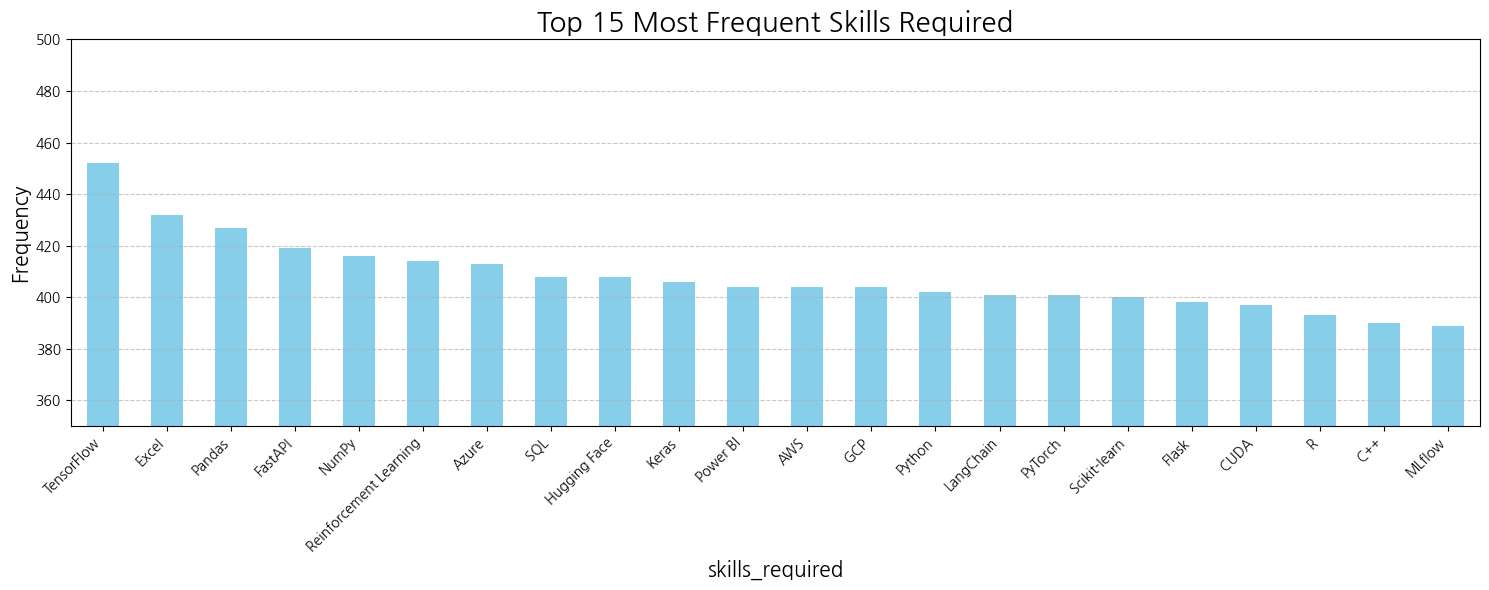

In [54]:
skills_series = (
    df['skills_required']
    .dropna()
    .str.split(',')          # 콤마 기준 분리
    .explode()               # 리스트 풀기
    .str.strip()             # 공백 제거
)

# 기술별 등장 횟수 계산
skill_counts = skills_series.value_counts()

# 상위 15개 기술만 시각화
plt.figure(figsize=(15,6))
skill_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Frequent Skills Required', fontsize=20)
plt.xlabel('skills_required', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(350,500)
plt.tight_layout()
plt.show()

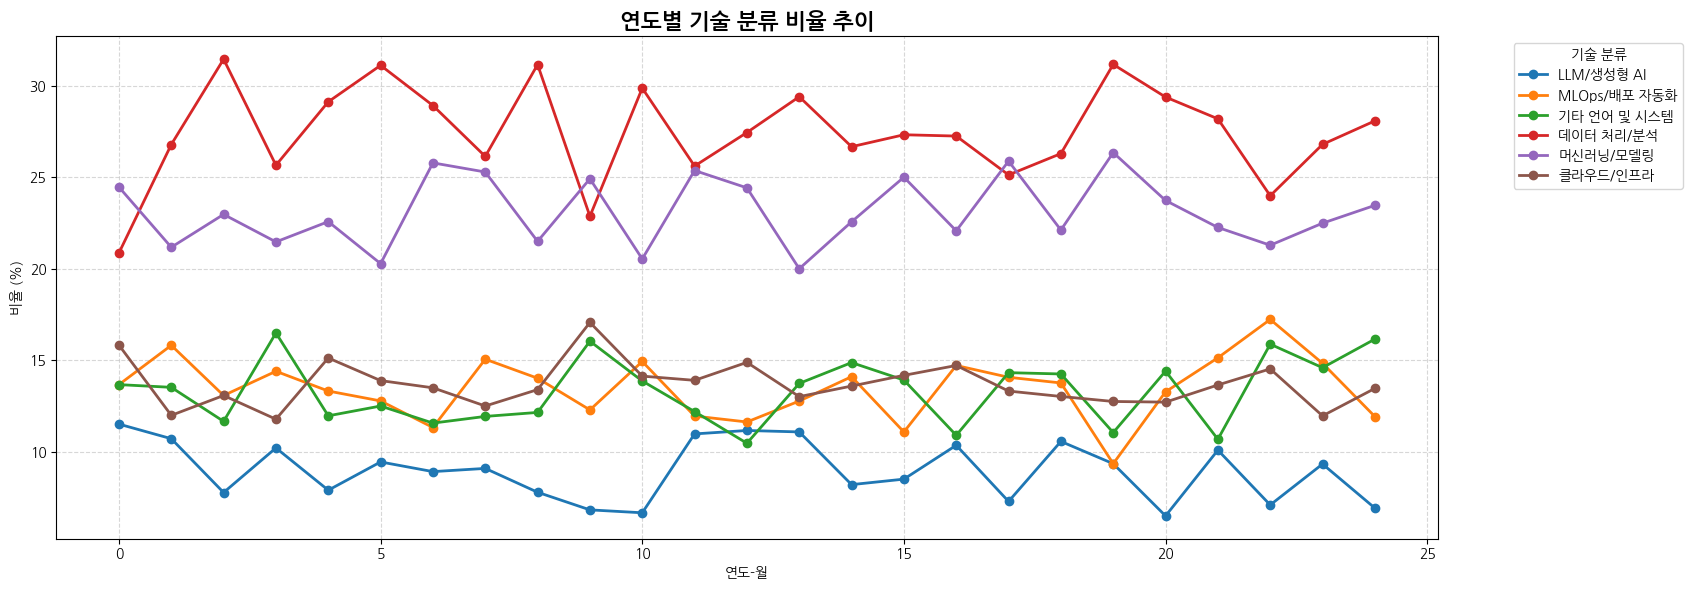

In [55]:
# -------------------------------
#  데이터 불러오기 및 전처리
# -------------------------------
# df = pd.read_csv("/content/ai_job_market.csv")  # 코랩 기준


# 연도 추출
df['year'] = df['posted_date'].str[:4]
df['year_month'] = pd.to_datetime(df['posted_date']).dt.to_period('M').astype(str)

# tools_preferred 분리 및 확장
df['skills_required'] = df['skills_required'].apply(lambda x: [t.strip() for t in x.split(',')])
df_exploded = df.explode('skills_required')

# -------------------------------
#  기술 분류 매핑
# -------------------------------
category_map = {
    # 머신러닝 / 모델링
    "Scikit-learn": "머신러닝/모델링",
    "TensorFlow": "머신러닝/모델링",
    "PyTorch": "머신러닝/모델링",
    "Keras": "머신러닝/모델링",
    "Reinforcement Learning": "머신러닝/모델링",

    # 데이터 처리 / 분석
    "Pandas": "데이터 처리/분석",
    "NumPy": "데이터 처리/분석",
    "SQL": "데이터 처리/분석",
    "Excel": "데이터 처리/분석",
    "Power BI": "데이터 처리/분석",
    "R": "데이터 처리/분석",

    # 클라우드 / 인프라
    "AWS": "클라우드/인프라",
    "GCP": "클라우드/인프라",
    "Azure": "클라우드/인프라",
    "BigQuery": "클라우드/인프라",
    "KDB+": "클라우드/인프라",

    # MLOps / 배포 자동화
    "MLflow": "MLOps/배포 자동화",
    "Docker": "MLOps/배포 자동화",
    "FastAPI": "MLOps/배포 자동화",
    "Flask": "MLOps/배포 자동화",

    # LLM / 생성형 AI
    "LangChain": "LLM/생성형 AI",
    "Hugging Face": "LLM/생성형 AI",

    # 기타 언어 및 시스템
    "C++": "기타 언어 및 시스템",
    "CUDA": "기타 언어 및 시스템",
    "Python": "기타 언어 및 시스템"
}

df_exploded['category'] = df_exploded['skills_required'].map(category_map)
df_exploded = df_exploded.dropna(subset=['category'])

# -------------------------------
#  연도-월별 카테고리 비율 계산
# -------------------------------
pivot_data = (
    df_exploded.groupby(['year_month', 'category'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack(fill_value=0)
)
pivot_data = pivot_data.reset_index(drop=True)



# -------------------------------
#  꺾은선 그래프 시각화
# -------------------------------
plt.figure(figsize=(17, 6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], marker='o', linewidth=2, label=col)

plt.title("연도별 기술 분류 비율 추이", fontsize=16, weight='bold')
plt.xlabel("연도-월")
plt.ylabel("비율 (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="기술 분류", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


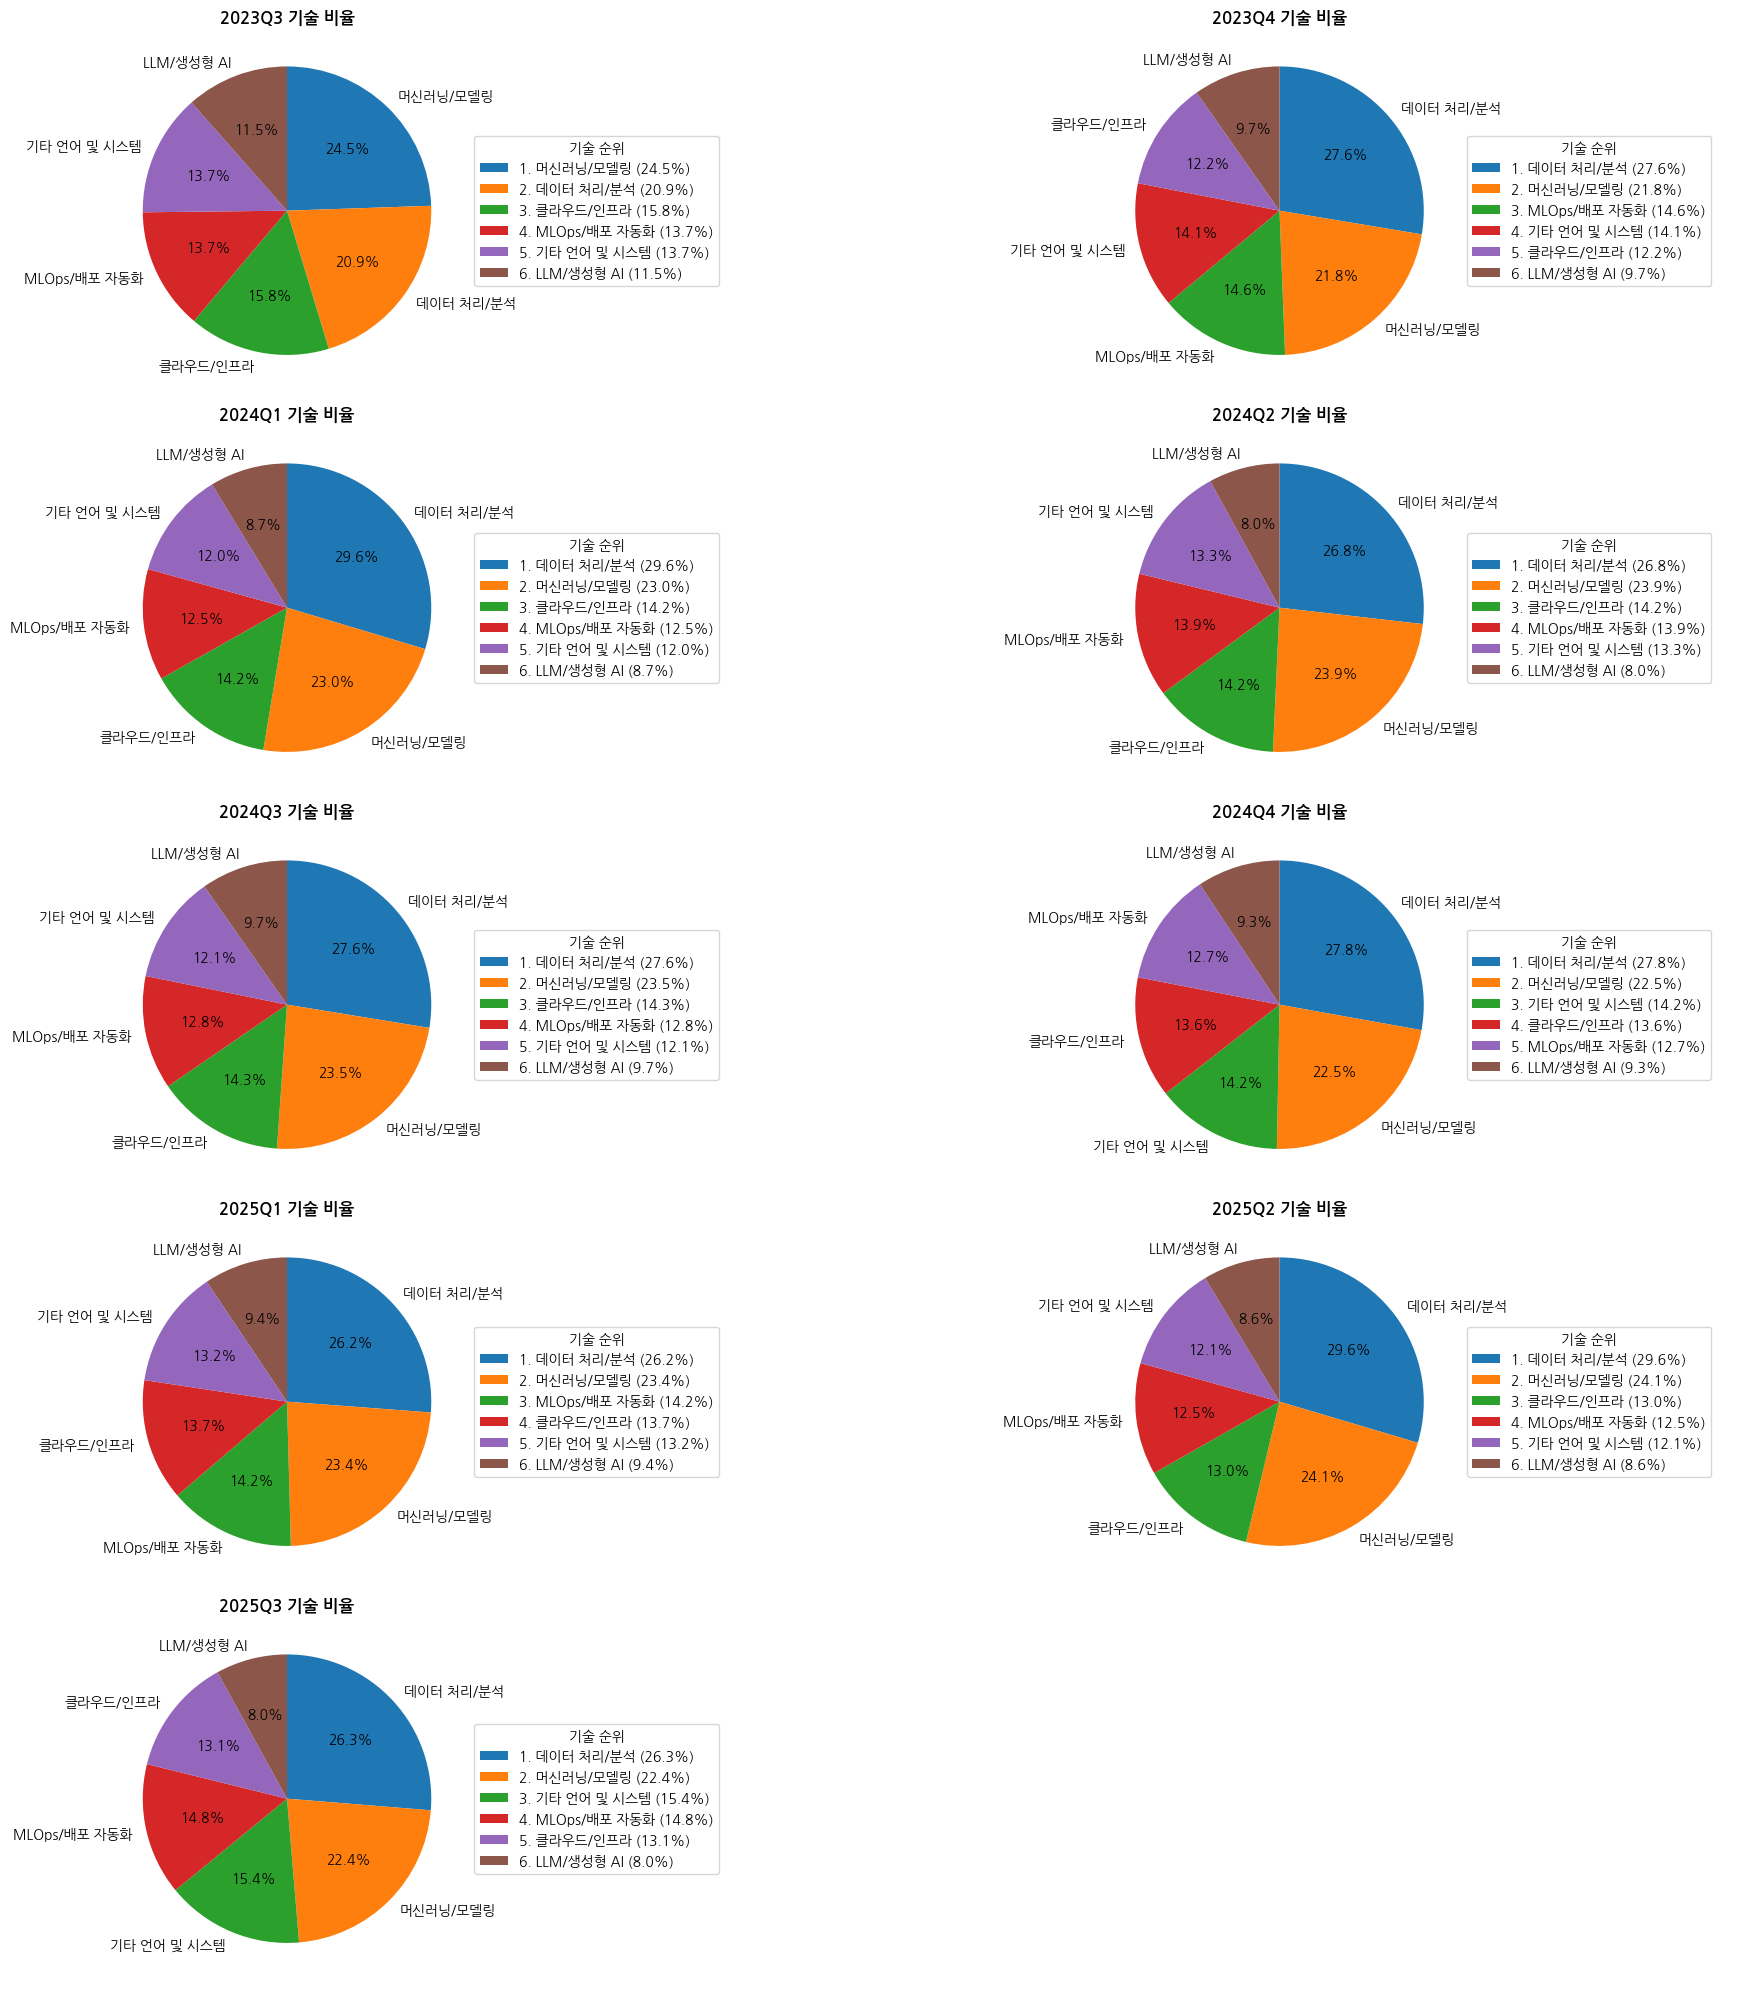

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ 날짜형 변환 및 분기 생성
# -------------------------------
df_exploded['posted_date'] = pd.to_datetime(df_exploded['posted_date'], errors='coerce')
df_exploded = df_exploded.dropna(subset=['posted_date'])
df_exploded['year_quarter'] = df_exploded['posted_date'].dt.to_period('Q').astype(str)

# -------------------------------
# 2️⃣ 카테고리 매핑
# -------------------------------
category_map = {
    "Scikit-learn": "머신러닝/모델링",
    "TensorFlow": "머신러닝/모델링",
    "PyTorch": "머신러닝/모델링",
    "Keras": "머신러닝/모델링",
    "Reinforcement Learning": "머신러닝/모델링",
    "Pandas": "데이터 처리/분석",
    "NumPy": "데이터 처리/분석",
    "SQL": "데이터 처리/분석",
    "Excel": "데이터 처리/분석",
    "Power BI": "데이터 처리/분석",
    "R": "데이터 처리/분석",
    "AWS": "클라우드/인프라",
    "GCP": "클라우드/인프라",
    "Azure": "클라우드/인프라",
    "BigQuery": "클라우드/인프라",
    "KDB+": "클라우드/인프라",
    "MLflow": "MLOps/배포 자동화",
    "Docker": "MLOps/배포 자동화",
    "FastAPI": "MLOps/배포 자동화",
    "Flask": "MLOps/배포 자동화",
    "LangChain": "LLM/생성형 AI",
    "Hugging Face": "LLM/생성형 AI",
    "C++": "기타 언어 및 시스템",
    "CUDA": "기타 언어 및 시스템",
    "Python": "기타 언어 및 시스템"
}
df_exploded['category'] = df_exploded['skills_required'].map(category_map)
df_exploded = df_exploded.dropna(subset=['category'])

pivot_data.index = pivot_data.index.map(lambda x: x[0] if isinstance(x, tuple) else x)
# -------------------------------
# 3️⃣ 분기별 비율 계산
# -------------------------------
pivot_data = (
    df_exploded.groupby(['year_quarter', 'category'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack(fill_value=0)
)

pivot_data.index = pivot_data.index.map(lambda x: x[0] if isinstance(x, tuple) else x)

# -------------------------------
# 4️⃣ 파이차트 + 순위 범례 표시
# -------------------------------
quarters = sorted(pivot_data.index)
fig, axes = plt.subplots(len(quarters)//4 + 3, 2, figsize=(20, 20))
axes = axes.flatten()

for i, quarter in enumerate(quarters):
    data = pivot_data.loc[quarter].sort_values(ascending=False)
    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )

    # ✅ 범례용 순위 텍스트 생성
    rank_text = [f"{idx+1}. {cat} ({val:.1f}%)" for idx, (cat, val) in enumerate(data.items())]

    # ✅ 파이차트 오른쪽에 범례 표시
    axes[i].legend(
        rank_text,
        title="기술 순위",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

    axes[i].set_title(f"{quarter} 기술 비율", fontsize=12, weight='bold')

# 남는 빈칸 비활성화
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



📌 대표 5개 국가 (KR 포함):
High Salary: ['EE', 'LV', 'SK', 'RS', 'GE']
Mid Salary: ['DZ', 'IS', 'UA', 'TR', 'SE']
Low Salary: ['RU', 'BJ', 'SI', 'MW', 'GH']

💡 대표 기술 상위 2개:
High Salary: Scikit-learn, Azure
Mid Salary: TensorFlow, SQL
Low Salary: Excel, TensorFlow


/tmp/ipython-input-1320018008.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


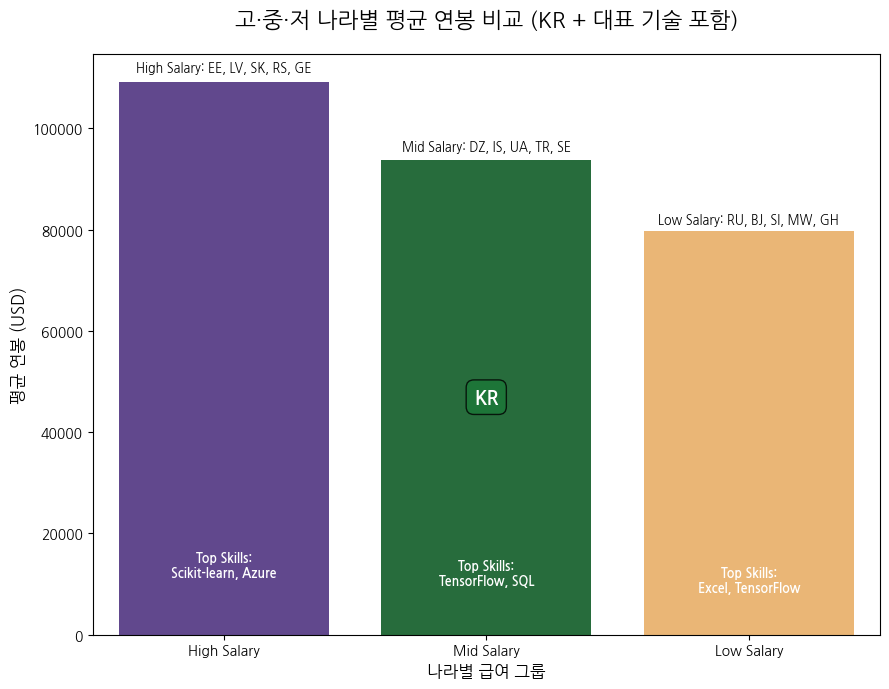

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm
import os
import re

# =====================================================
# ✅ [2] 데이터 불러오기 및 전처리
# =====================================================
df = pd.read_csv("ai_job_market.csv")

# 🔹 location에서 국가 코드만 추출 (예: "Tracybury, AR" → "AR")
df['location'] = df['location'].astype(str).apply(lambda x: x.split(',')[-1].strip() if ',' in x else x.strip())

# 🔹 salary_range_usd에서 앞 숫자만 추출 (예: "92860-109598" → 92860)
def extract_min_salary(s):
    if pd.isna(s):
        return None
    match = re.match(r'(\d+)', str(s))
    return int(match.group(1)) if match else None

df['salary_range_usd'] = df['salary_range_usd'].apply(extract_min_salary)

# =====================================================
# ✅ [3] 국가별 평균 연봉 계산 및 KMeans 클러스터링
# =====================================================
country_salary = df.groupby('location')['salary_range_usd'].mean().reset_index()
country_salary.columns = ['country', 'avg_salary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_salary[['avg_salary']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_salary['cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터별 평균 연봉 계산
cluster_mean = country_salary.groupby('cluster')['avg_salary'].mean().reset_index()
cluster_mean = cluster_mean.sort_values('avg_salary', ascending=False).reset_index(drop=True)
cluster_mean['group'] = ['High Salary', 'Mid Salary', 'Low Salary']

# 클러스터 → 그룹 매핑
cluster_to_group = dict(zip(cluster_mean['cluster'], cluster_mean['group']))
country_salary['salary_group'] = country_salary['cluster'].map(cluster_to_group)

# =====================================================
# ✅ [4] KR 누락 시 강제 추가
# =====================================================
if 'KR' not in country_salary['country'].values:
    kr_avg = df['salary_range_usd'].mean()
    kr_row = pd.DataFrame([{'country': 'KR', 'avg_salary': kr_avg, 'salary_group': 'Mid Salary'}])
    country_salary = pd.concat([country_salary, kr_row], ignore_index=True)

# =====================================================
# ✅ [5] 각 그룹별 대표 5개 국가 (KR 포함)
# =====================================================
representatives = {}
for group in ['High Salary', 'Mid Salary', 'Low Salary']:
    subset = country_salary[country_salary['salary_group'] == group]
    if subset.empty:
        continue

    if group == 'Low Salary':
        reps = subset.sort_values('avg_salary', ascending=True).head(5)
    else:
        reps = subset.sort_values('avg_salary', ascending=False).head(5)

    # KR 포함 보장
    if group == 'Mid Salary' and 'KR' not in reps['country'].values:
        kr_row = subset[subset['country'] == 'KR']
        reps = pd.concat([reps, kr_row]).drop_duplicates('country').head(5)

    representatives[group] = reps['country'].tolist()

print("\n📌 대표 5개 국가 (KR 포함):")
for group, countries in representatives.items():
    print(f"{group}: {countries}")

# =====================================================
# ✅ [6] 각 그룹별 대표 기술(skill) 2개 추출
# =====================================================
skill_summary = {}

if 'skills_required' in df.columns:
    df['skills_required'] = df['skills_required'].fillna("")
    df_expanded = df.assign(skill=df['skills_required'].str.split(',')).explode('skill')
    df_expanded['skill'] = df_expanded['skill'].str.strip()

    for group in ['High Salary', 'Mid Salary', 'Low Salary']:
        group_countries = country_salary[country_salary['salary_group'] == group]['country']
        group_df = df_expanded[df_expanded['location'].isin(group_countries)]
        top_skills = (
            group_df['skill']
            .value_counts()
            .head(2)
            .index
            .tolist()
        )
        skill_summary[group] = ", ".join(top_skills)
else:
    skill_summary = {g: "N/A" for g in ['High Salary', 'Mid Salary', 'Low Salary']}

print("\n💡 대표 기술 상위 2개:")
for group, skills in skill_summary.items():
    print(f"{group}: {skills}")

# =====================================================
# ✅ [7] 시각화
# =====================================================
plt.figure(figsize=(9, 7))
bar_colors = ['#5e3c99', '#1b7837', '#fdb863']

sns.barplot(
    x='group',
    y='avg_salary',
    data=cluster_mean,
    palette=bar_colors
)

plt.title("고·중·저 나라별 평균 연봉 비교 (KR + 대표 기술 포함)", fontsize=16, pad=20)
plt.xlabel("나라별 급여 그룹", fontsize=12)
plt.ylabel("평균 연봉 (USD)", fontsize=12)

# -----------------------------
# 상단에 대표 국가 표시
# -----------------------------
for i, row in cluster_mean.iterrows():
    group = row['group']
    reps = ", ".join(representatives.get(group, []))
    plt.text(
        i, row['avg_salary'] + (row['avg_salary'] * 0.02),
        f"{group}: {reps}",
        ha='center', fontsize=9, color='black'
    )

# -----------------------------
# 중앙에 KR 강조 (Mid Salary)
# -----------------------------
mid_row = cluster_mean[cluster_mean['group'] == 'Mid Salary']
if not mid_row.empty:
    i = mid_row.index[0]
    y = mid_row['avg_salary'].values[0]
    plt.text(
        i, y / 2,
        "KR",
        ha='center', va='center',
        fontsize=14, fontweight='bold', color='white',
        bbox=dict(facecolor='#1b7837', alpha=0.8, boxstyle='round,pad=0.4')
    )

# -----------------------------
# ✅ 막대 내부 하단에 대표 기술 표시 (글씨 흰색)
# -----------------------------
for i, row in cluster_mean.iterrows():
    group = row['group']
    skills = skill_summary.get(group, "")
    y = row['avg_salary'] * 0.1   # 막대 내부 하단 (10% 위치)
    plt.text(
        i, y,
        f"Top Skills:\n{skills}",
        ha='center', va='bottom',
        fontsize=9, color='white', fontweight='bold'
    )

plt.tight_layout()
plt.show()